# Description
This notebook does a statistical analysis of a mana point (MP) spell casting system where a magic user gains 1dx + bonus mana points per level.  The number of MP required to cast a spell is equal to the spell level or the level it is cast at.  The baseline for comparison, which appears as BF Core Rules in the plot legend, is based on the table created by Dimirag on the [Basic Fantasy forums](https://www.basicfantasy.org/forums/viewtopic.php?t=5139).

# Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(legacy='1.25')
import pandas as pd

# Functions

In [2]:
def roll(die=4,level=1,ability_bonus=0):
    """
    randomly generate the number of MP given a die type, level, and ability bonus
    e.g. for a level 3 character, with +2 to their ability score, rolling a d4 to detemine MP this would simulate 3d4+2
    """
    result = level * (np.random.randint(1,die+1) + ability_bonus)
    return result
    
def stats(rolls):
    
    mean = np.mean(rolls)
    std = np.std(rolls)
    min = np.min(rolls)
    max = np.max(rolls)

    return {'mean':mean, 'std':std, 'min':min, 'max':max }

# Simulation

In [3]:
# dice used to determine MP earned at each level
dice = [4,6]
# characters ability bonus added to die roll.  
ability_bonuses = [0,1,2,3]
# number of levels to consider
levels = 20
# number of simulated dice+ability_bonus rolls
n_rolls = 1000
# dictionary to hold results
results = {}
# spell points according to dimirag's SpellPoints.jpg
projected_mp = np.array([1,2,4,6,9,13,17,23,28,37,45,55,58,63,64,66,76,77,80,85])
# simulate rolls and generate statistics
for die in dice:
    for ab in ability_bonuses:
        for level in range(1,levels+1):
            rolls = []
            for _ in range(n_rolls):
                rolls.append(roll(die,level,ab))
            rolls = np.array(rolls)
            d = stats(rolls)
            if level==1:
                df = pd.DataFrame(d,index=[level])
            else:
                df = pd.concat([df,pd.DataFrame(d,index=[level])])
        results[(die,ab)] = df

# Figures

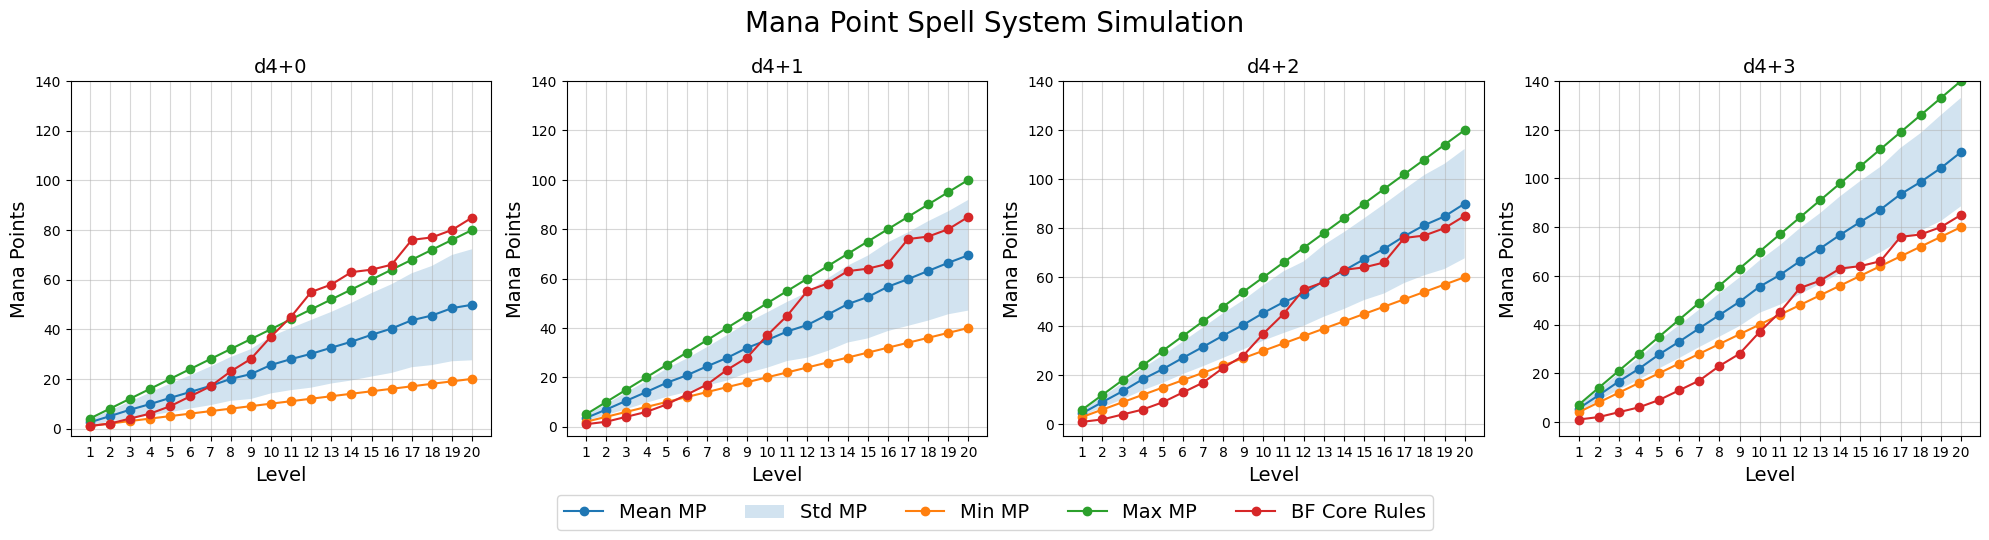

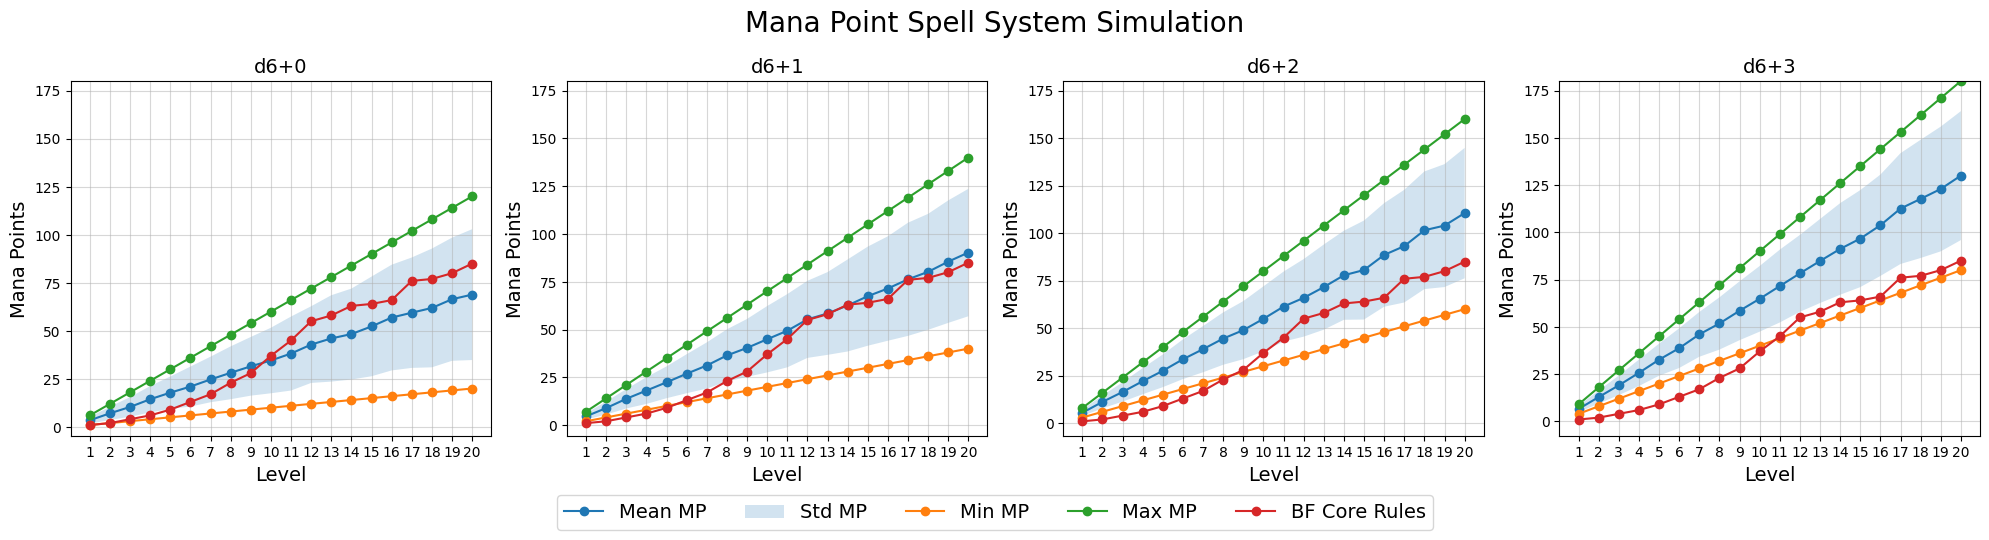

In [4]:
for die in dice:
    
    fig,axs = plt.subplots(1,4,figsize=(20,5))
    fig.suptitle('Mana Point Spell System Simulation',fontsize=20)
    for idx,ab in enumerate(ability_bonuses):
    
        x = range(1,levels+1)
        mean = results[(die,ab)]['mean'].values
        std = results[(die,ab)]['std'].values
        min = results[(die,ab)]['min'].values
        max = results[(die,ab)]['max'].values
        axs[idx].plot(x,mean,'-o',label='Mean MP',)
        axs[idx].fill_between(x,mean-std,mean+std,alpha=0.2,label='Std MP')
        axs[idx].plot(x,min,'-o',label='Min MP')
        axs[idx].plot(x,max,'-o',label='Max MP')
        axs[idx].plot(x,projected_mp,'-o',label='BF Core Rules')
        axs[idx].set_title(f'd{die}+{ab}',fontsize=14)
        axs[idx].tick_params(axis='both', which='major', labelsize=10)
        
    for ax in axs.flatten():
        ax.set_xlabel('Level',fontsize=14)
        ax.set_ylabel('Mana Points',fontsize=14)
        ax.grid(alpha=0.5)
        ax.set_ylim(top=levels*(die+ab))
        ax.set_xticks(range(1,21))

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',ncol=5,bbox_to_anchor=(0.5,-0.08),fontsize=14)
    plt.tight_layout()
    plt.show()
    plt.close()